In [2]:
import seaborn as sns
import pandas as pd
import matplotlib as plt
import numpy as np
font_name = plt.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
plt.rc('font', family=font_name)

In [3]:
d1=pd.read_excel("C:/Users/user/Desktop/2019/2019년 1월.xlsx")
d2=pd.read_excel("C:/Users/user/Desktop/2019/2019년 2월.xlsx")
d3=pd.read_excel("C:/Users/user/Desktop/2019/2019년 3월.xlsx")
d4=pd.read_excel("C:/Users/user/Desktop/2019/2019년 4월.xlsx")
d5=pd.read_excel("C:/Users/user/Desktop/2019/2019년 5월.xlsx")
d6=pd.read_excel("C:/Users/user/Desktop/2019/2019년 6월.xlsx")
d7=pd.read_excel("C:/Users/user/Desktop/2019/2019년 7월.xlsx")
d8=pd.read_excel("C:/Users/user/Desktop/2019/2019년 8월.xlsx")
d9=pd.read_excel("C:/Users/user/Desktop/2019/2019년 9월.xlsx")
d10=pd.read_excel("C:/Users/user/Desktop/2019/2019년 10월.xlsx")
d11=pd.read_excel("C:/Users/user/Desktop/2019/2019년 11월.xlsx")
d12=pd.read_excel("C:/Users/user/Desktop/2019/2019년 12월.xlsx")

In [4]:
'''
PM10: 미세먼지
PM25: 초미세먼지
사용할 column: 지역,측정소코드,측정일시,PM10,PM25
결정해야 할 것: 모든 서울 지역? or 특정한 구만?
- 유동인구 데이터에 따라 결정해야 할 것 같습니다. 제가 유동인구와 미세먼지와의 상관관계를 밝히고,
유동인구와 시청률이 관계가 있지 않을까해서 미세먼지데이터셋을 불러온 거여서요
-시간: 2019010101: 매일 한시간마다/ 매일..
-한시간만 하게 된다면 서울시에서 측정일시에 따라 PM10/PM25를 평균을 내서 불러와야할 거 같습니다.
'''

'\nPM10: 미세먼지\nPM25: 초미세먼지\n사용할 column: 지역,측정소코드,측정일시,PM10,PM25\n결정해야 할 것: 모든 서울 지역? or 특정한 구만?\n- 유동인구 데이터에 따라 결정해야 할 것 같습니다. 제가 유동인구와 미세먼지와의 상관관계를 밝히고,\n유동인구와 시청률이 관계가 있지 않을까해서 미세먼지데이터셋을 불러온 거여서요\n-시간: 2019010101: 매일 한시간마다/ 매일..\n-한시간만 하게 된다면 서울시에서 측정일시에 따라 PM10/PM25를 평균을 내서 불러와야할 거 같습니다.\n'

In [5]:
# 서울 지역구 이름
seoul_gu=['서울 강남구','서울 강동구','서울 강북구','서울 강서구','서울 관악구','서울 광진구','서울 구로구','서울 금천구','서울 노원구','서울 도봉구','서울 동대문구','서울 동작구',
                        '서울 마포구','서울 서대문구','서울 서초구','서울 성동구','서울 성북구','서울 송파구','서울 양천구','서울 영등포구','서울 용산구','서울 은평구','서울 종로구','서울 중구','서울 중랑구']

In [6]:
# 서울 지역만 데이터프레임에서 추출
seoul1=d1[d1['지역'].isin(seoul_gu)]

In [7]:
seoul1

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 중구,도시대기,111121,중구,2019010101,0.003,0.7,0.003,0.054,39.0,24.0,서울 중구 덕수궁길 15
1,서울 중구,도시대기,111121,중구,2019010102,0.003,0.8,0.002,0.056,38.0,27.0,서울 중구 덕수궁길 15
2,서울 중구,도시대기,111121,중구,2019010103,0.003,0.9,0.002,0.057,42.0,28.0,서울 중구 덕수궁길 15
3,서울 중구,도시대기,111121,중구,2019010104,0.003,0.8,0.002,0.054,42.0,31.0,서울 중구 덕수궁길 15
4,서울 중구,도시대기,111121,중구,2019010105,0.003,0.8,0.002,0.048,49.0,33.0,서울 중구 덕수궁길 15
...,...,...,...,...,...,...,...,...,...,...,...,...
29755,서울 노원구,도로변대기,111312,화랑로,2019013120,0.005,0.5,0.010,0.035,69.0,17.0,서울 노원구 화랑로 429
29756,서울 노원구,도로변대기,111312,화랑로,2019013121,0.005,0.5,0.014,0.028,76.0,18.0,서울 노원구 화랑로 429
29757,서울 노원구,도로변대기,111312,화랑로,2019013122,0.004,0.4,0.015,0.028,63.0,14.0,서울 노원구 화랑로 429
29758,서울 노원구,도로변대기,111312,화랑로,2019013123,0.004,0.4,0.016,0.024,48.0,11.0,서울 노원구 화랑로 429


In [8]:
#측정일시에 따른 PM10,과 PM25의 평균을 내서 데이터 프레임 새로 만듦 (1월~12월)
bytime1=seoul1.groupby(['측정일시'],as_index=False )['PM10','PM25'].mean()

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [9]:
bytime1

,측정일시,PM10,PM25
0,2019010101,41.600000,25.975000
1,2019010102,42.175000,27.200000
2,2019010103,43.250000,28.425000
3,2019010104,41.200000,28.000000
4,2019010105,43.000000,28.975000
...,...,...,...
739,2019013120,79.100000,16.600000
740,2019013121,71.950000,15.974359
741,2019013122,64.025000,13.625000
742,2019013123,53.925000,12.175000


In [10]:
bytime1['측정일시']

0      2019010101
1      2019010102
2      2019010103
3      2019010104
4      2019010105
          ...    
739    2019013120
740    2019013121
741    2019013122
742    2019013123
743    2019013124
Name: 측정일시, Length: 744, dtype: int64

In [11]:
# 서울 지역만 분리
seoul2=d2[d2['지역'].isin(seoul_gu)]
bytime2=seoul2.groupby(['측정일시'],as_index=False )['PM10','PM25'].mean()
seoul3=d3[d3['지역'].isin(seoul_gu)]
bytime3=seoul3.groupby(['측정일시'],as_index=False )['PM10','PM25'].mean()
seoul4=d4[d4['지역'].isin(seoul_gu)]
bytime4=seoul4.groupby(['측정일시'],as_index=False )['PM10','PM25'].mean()
seoul5=d5[d5['지역'].isin(seoul_gu)]
bytime5=seoul5.groupby(['측정일시'],as_index=False )['PM10','PM25'].mean()
seoul6=d6[d6['지역'].isin(seoul_gu)]
bytime6=seoul6.groupby(['측정일시'],as_index=False )['PM10','PM25'].mean()
seoul7=d7[d7['지역'].isin(seoul_gu)]
bytime7=seoul7.groupby(['측정일시'],as_index=False )['PM10','PM25'].mean()
seoul8=d8[d8['지역'].isin(seoul_gu)]
bytime8=seoul8.groupby(['측정일시'],as_index=False )['PM10','PM25'].mean()
seoul9=d9[d9['지역'].isin(seoul_gu)]
bytime9=seoul9.groupby(['측정일시'],as_index=False )['PM10','PM25'].mean()
seoul10=d10[d10['지역'].isin(seoul_gu)]
bytime10=seoul10.groupby(['측정일시'],as_index=False )['PM10','PM25'].mean()
seoul11=d11[d11['지역'].isin(seoul_gu)]
bytime11=seoul11.groupby(['측정일시'],as_index=False )['PM10','PM25'].mean()
seoul12=d12[d12['지역'].isin(seoul_gu)]
bytime12=seoul12.groupby(['측정일시'],as_index=False )['PM10','PM25'].mean()

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if __name__ == '__main__':
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Indexing with multi

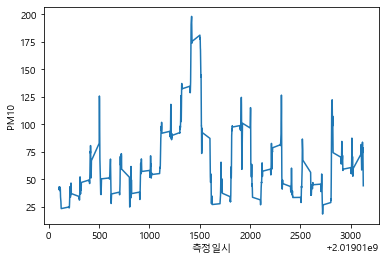

In [12]:
#월별 미세먼지 lineplot
sns.lineplot(data=bytime1, x="측정일시", y="PM10")
#월별 초미세먼지 lineplot


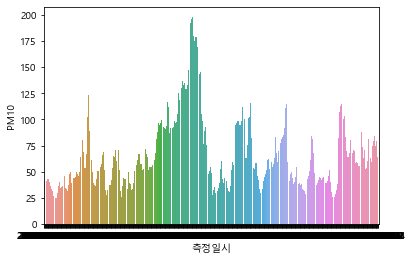

In [13]:
sns.barplot(data=bytime1,x="측정일시", y="PM10")


In [14]:
#1월~12월 데이터 합치기
frames=[bytime1,bytime2,bytime3,bytime4,bytime5,bytime6,bytime7,bytime8,bytime9,bytime10,bytime11,bytime12]
seoul=pd.concat(frames)
seoul

,측정일시,PM10,PM25
0,2019010101,41.600000,25.975000
1,2019010102,42.175000,27.200000
2,2019010103,43.250000,28.425000
3,2019010104,41.200000,28.000000
4,2019010105,43.000000,28.975000
...,...,...,...
739,2019123120,25.525000,14.600000
740,2019123121,26.275000,15.850000
741,2019123122,24.200000,14.375000
742,2019123123,24.625000,15.342105


In [ ]:
# 측정일시를 시간으로 바꾸기
# 요일별/시간별로 나누기

In [15]:
mean1=bytime1['PM10'].mean()
mean2=bytime2['PM10'].mean()
mean3=bytime3['PM10'].mean()
mean4=bytime4['PM10'].mean()
mean5=bytime5['PM10'].mean()
mean6=bytime6['PM10'].mean()
mean7=bytime7['PM10'].mean()
mean8=bytime8['PM10'].mean()
mean9=bytime9['PM10'].mean()
mean10=bytime10['PM10'].mean()
mean11=bytime11['PM10'].mean()
mean12=bytime12['PM10'].mean()
mean=pd.DataFrame(data={'월':[1,2,3,4,5,6,7,8,9,10,11,12],'미세먼지 월평균':[mean1,mean2,mean3,mean4,mean5,mean6,mean7,mean8,mean9,mean10,mean11,mean12]})

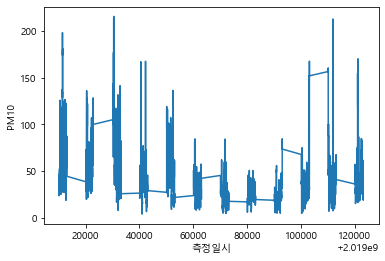

In [16]:

sns.lineplot(data=seoul, x="측정일시", y="PM10")

In [17]:
mean

,월,미세먼지 월평균
0,1,65.536413
1,2,57.599430
2,3,70.233206
3,4,42.799155
4,5,54.591153
5,6,30.188220
6,7,27.373041
7,8,25.743960
8,9,22.436080
9,10,31.694491


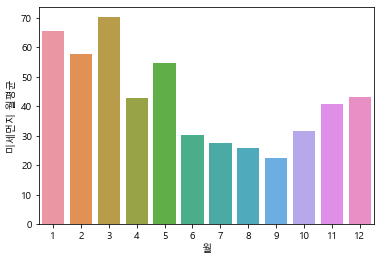

In [18]:
sns.barplot(data=mean, x="월", y="미세먼지 월평균")

